In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train_o, y_train_o), (x_test_o, y_test_o) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
x_train_o.shape

(60000, 28, 28)

In [6]:
y_train_o.shape

(60000,)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train_o)

In [8]:
y_train.shape

(60000, 10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
y_test = tf.keras.utils.to_categorical(y_test_o)

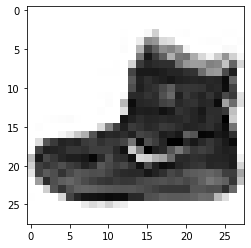

In [11]:
plt.imshow(x_train_o[0], cmap="Greys")

In [12]:
x_train_o[0].sum()/(28*28)

97.25382653061224

In [13]:
x_train_o[0].std()

101.79234620324726

In [0]:
x_train = np.zeros([60000,28,28])
for i in range(60000):
  x_train[i] =( x_train_o[i] - (x_train_o[i].sum()/(28*28))  ) / x_train_o[i].std()

In [15]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,28,28,1)

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add( tf.keras.layers.Conv2D(256, (8,8), padding = "same", input_shape = (28,28,1), activation=tf.keras.layers.LeakyReLU(alpha=0.3) )   )
model.add( tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate = 0.4))

In [0]:
model.add( tf.keras.layers.Conv2D(128, (3,3), padding = "same", input_shape = (28,28,1), activation=tf.keras.layers.LeakyReLU(alpha=0.3) )   )
model.add(tf.keras.layers.BatchNormalization())

model.add( tf.keras.layers.Conv2D(64, (3,3), padding = "same", input_shape = (28,28,1), activation=tf.keras.layers.LeakyReLU(alpha=0.3) )   )
model.add(tf.keras.layers.BatchNormalization())

model.add( tf.keras.layers.Conv2D(32, (1,1), padding = "same", input_shape = (28,28,1), activation=tf.keras.layers.LeakyReLU(alpha=0.3) )   )
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(rate = 0.3))

model.add( tf.keras.layers.Conv2D(64, (3,3), padding = "same", input_shape = (28,28,1), activation=tf.keras.layers.LeakyReLU(alpha=0.3) )   )
model.add(tf.keras.layers.BatchNormalization())

model.add( tf.keras.layers.Conv2D(32, (1,1), padding = "same", input_shape = (28,28,1), activation=tf.keras.layers.LeakyReLU(alpha=0.3) )   )
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(rate = 0.3))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       16640     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 256)       1024      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        7

In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(32, input_dim = 288 ,activation = "relu" ))
model.add(tf.keras.layers.Dropout(rate = 0.5))
model.add(tf.keras.layers.Dense(10,activation = "softmax" ))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       16640     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 256)       1024      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        7

In [0]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [29]:
history = model.fit(x_train, y_train, batch_size = 300, epochs= 128)

Epoch 1/128
200/200 [==============================] - 7s 34ms/step - loss: 0.2029 - accuracy: 0.9285
Epoch 2/128
200/200 [==============================] - 7s 34ms/step - loss: 0.2019 - accuracy: 0.9295
Epoch 3/128
200/200 [==============================] - 7s 34ms/step - loss: 0.1994 - accuracy: 0.9291
Epoch 4/128
200/200 [==============================] - 7s 34ms/step - loss: 0.1978 - accuracy: 0.9308
Epoch 5/128
200/200 [==============================] - 7s 34ms/step - loss: 0.2016 - accuracy: 0.9299
Epoch 6/128
200/200 [==============================] - 7s 34ms/step - loss: 0.2000 - accuracy: 0.9292
Epoch 7/128
200/200 [==============================] - 7s 34ms/step - loss: 0.1963 - accuracy: 0.9304
Epoch 8/128
200/200 [==============================] - 7s 34ms/step - loss: 0.1970 - accuracy: 0.9299
Epoch 9/128
200/200 [==============================] - 7s 34ms/step - loss: 0.1966 - accuracy: 0.9300
Epoch 10/128
200/200 [==============================] - 7s 34ms/step - loss: 0.196

In [0]:
x_test = np.zeros([10000,28,28])
for i in range(10000):
  x_test[i] =( x_test_o[i] - (x_test_o[i].sum()/(28*28))  ) / x_test_o[i].std()

In [32]:
x_test = x_test.reshape(10000,28,28,1)
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2511 - accuracy: 0.9269


## Model structure: <br />
 #### conv 8*8 , 256<br />
    Maxpooling 2*2
    Normaliztion
    dropout

 #### conv 3*3 , 128<br />
    Normaliztion

 #### conv 3*3 , 64, <br /> 
    Normaliztion
 #### conv 1*1 , 32<br />
    Maxpooling 2*2
    dropout
 #### conv 3*3 , 64, <br /> 
    Normaliztion
 #### conv 1*1 , 32<br />
    Maxpooling 2*2
    dropout
 #### FNN 32<br />
    dropout
 #### FNN 10<br />
 #### Adam, Crossentrophy

batchsize -> 50-> 80-> 100-> 200-> 300<br />
epochs    -> 20-> 20-> 30->  50 -> 128
